In [80]:
from random import random
import numpy as np
import jieba
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

rand_seed = 22

dataset = pd.read_csv("./dataset.csv", sep="\t", header=None)

In [81]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12100 non-null  object
 1   1       12100 non-null  object
dtypes: object(2)
memory usage: 189.2+ KB
None


In [82]:
dataset.head(5)

,0,1
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query
1,从这里怎么回家,Travel-Query
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play
3,给看一下墓王之王嘛,FilmTele-Play
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play


jieba分词

In [92]:
words_sentence = dataset[0].apply(lambda x: " ".join(jieba.lcut(x)))
words_sentence

0                    还有 双鸭山 到 淮阴 的 汽车票 吗 13 号 的
1                                    从 这里 怎么 回家
2                     随便 播放 一首 专辑 阁楼 里 的 佛里 的 歌
3                                给 看 一下 墓 王之王 嘛
4             我 想 看 挑战 两把 s686 打 突变 团 竞 的 游戏 视频
                          ...                  
12095              一千六百五十 三加 三千 一百六十五 点 六五 等于 几
12096                             稍 小点 客厅 空调 风速
12097    黎耀祥 陈豪 邓萃雯 畲诗曼 陈 法拉 敖嘉年 杨怡 马浚伟 等 到场 出席
12098                       百事 盖世 群星 星光 演唱会 有 谁
12099                      下周一 视频会议 的 闹钟 帮 我 开开
Name: 0, Length: 12100, dtype: object

给特征去除一些没用的词

In [100]:
from stopwordsiso import stopwords

stopwords = stopwords('zh')
print(stopwords)

{'倘若', '设或', '呵', '总而言之', '～', '哟', '何处', '至', '了', '任凭', '会', '它们', '这边', '不外乎', '不妨', '当着', '哗', '至若', '岂但', '遵照', '哉', '您', '咋', '亦', '反过来', '日', '矣哉', '纵', '分', '自家', '矣乎', '以便', '而已', '那个', '非特', '只是', '何况', '含', '＜', '然而', '｝', '〉', '以为', '进而', '｛', '总的来看', '前者', '这样', '这时', '有些', '则', '或者', '乃', '此处', '吗', '是以', '喽', '都', '随时', '给', '难道说', '对比', '但', '如果', '一转眼', '不但', '要是', '是的', '唉', '如同', '罢了', '嗯', '中', '如上所述', '后者', '及', '赶', '已', '既是', '各个', '只怕', '；', '纵然', '更', '诚然', '咱们', '嗡嗡', '本地', '譬喻', '哎', '虽', '谁人', '也罢', '仍', '以故', '在于', '许多', '诸如', '８', '若非', '任何', '大家', '别人', '唯有', '具体地说', '可以', '另一方面', '嗳', '连同', '哎呀', '｜', '凡是', '％', '要', '上下', '２', '甚而', '继而', '再有', '打从', '本着', '受到', '莫若', '有的', '哪怕', '按', '即', '向使', '犹且', '或是', '如此', '叮咚', '各自', '彼', '往', '点', '叫', '︿', '用', '甚且', '对', '起见', '者', '至今', '正巧', '那些', '自己', '别管', '归', '秒', '既然', '啦', '人家', '自身', '那么', '任', '若', '等到', '本人', '接着', '自后', '若是', '就', '遵循', '对待', '虽说', '吱', '要么', '即令', '月', '既', '今', '正如', '以及', '啊',

In [ ]:
word_list = words_sentence[0].split()
filtered_words = [word for word in word_list if word not in stopwords]
print(" ".join(filtered_words))

In [103]:
def clean_text(words) -> str:
    if not words or pd.isna(words):
        return ''
    word_list = words.split()
    filtered_words = [word for word in word_list if word not in stopwords]
    return " ".join(filtered_words)

words_sentence.apply(clean_text)

0                             双鸭山 淮阴 汽车票 13 号
1                                          回家
2                       随便 播放 一首 专辑 阁楼 里 佛里 歌
3                                    一下 墓 王之王
4                   想 挑战 两把 s686 突变 团 竞 游戏 视频
                         ...                 
12095                一千六百五十 三加 三千 一百六十五 六五 等于
12096                           稍 小点 客厅 空调 风速
12097    黎耀祥 陈豪 邓萃雯 畲诗曼 陈 法拉 敖嘉年 杨怡 马浚伟 到场 出席
12098                         百事 盖世 群星 星光 演唱会
12099                        下周一 视频会议 闹钟 帮 开开
Name: 0, Length: 12100, dtype: object

In [52]:
dataset[0][0].split()

['还有双鸭山到淮阴的汽车票吗13号的']

#特征提取

In [53]:
vector = CountVectorizer()  # 对文本进行提取特征 默认是使用标点符号分词
vector.fit(words_sentence.values)
print(words_sentence.values)

['还有 双鸭山 到 淮阴 的 汽车票 吗 13 号 的' '从 这里 怎么 回家' '随便 播放 一首 专辑 阁楼 里 的 佛里 的 歌' ...
 '黎耀祥 陈豪 邓萃雯 畲诗曼 陈 法拉 敖嘉年 杨怡 马浚伟 等 到场 出席' '百事 盖世 群星 星光 演唱会 有 谁'
 '下周一 视频会议 的 闹钟 帮 我 开开']


In [54]:
input_feature = vector.transform(words_sentence.values)
print(input_feature)

  (np.int32(0), np.int32(27))	1
  (np.int32(0), np.int32(2444))	1
  (np.int32(0), np.int32(6174))	1
  (np.int32(0), np.int32(6389))	1
  (np.int32(0), np.int32(8933))	1
  (np.int32(1), np.int32(2974))	1
  (np.int32(1), np.int32(4493))	1
  (np.int32(1), np.int32(8964))	1
  (np.int32(2), np.int32(539))	1
  (np.int32(2), np.int32(774))	1
  (np.int32(2), np.int32(1460))	1
  (np.int32(2), np.int32(5034))	1
  (np.int32(2), np.int32(9399))	1
  (np.int32(2), np.int32(9538))	1
  (np.int32(3), np.int32(410))	1
  (np.int32(3), np.int32(6843))	1
  (np.int32(4), np.int32(361))	1
  (np.int32(4), np.int32(830))	1
  (np.int32(4), np.int32(4919))	1
  (np.int32(4), np.int32(6440))	1
  (np.int32(4), np.int32(7476))	1
  (np.int32(4), np.int32(8420))	1
  (np.int32(5), np.int32(2807))	1
  (np.int32(5), np.int32(4446))	1
  (np.int32(5), np.int32(4711))	1
  :	:
  (np.int32(12095), np.int32(1700))	1
  (np.int32(12095), np.int32(7592))	1
  (np.int32(12096), np.int32(3718))	1
  (np.int32(12096), np.int32(3868))	1

朴素贝叶斯

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(input_feature, dataset[1], test_size=0.2, random_state=rand_seed)

In [59]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
#预测
y_pred = nb_model.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred)
print(accuracy_nb)
report_nb = classification_report(y_test, y_pred)
print(report_nb)

0.8909090909090909
                       precision    recall  f1-score   support

         Alarm-Update       0.91      0.96      0.93       247
           Audio-Play       0.67      0.32      0.43        38
       Calendar-Query       0.91      0.99      0.95       244
        FilmTele-Play       0.80      0.89      0.84       255
HomeAppliance-Control       0.95      0.98      0.96       243
           Music-Play       0.91      0.84      0.88       275
                Other       0.17      0.03      0.05        35
         Radio-Listen       0.88      0.89      0.88       274
       TVProgram-Play       0.75      0.26      0.38        58
         Travel-Query       0.94      0.97      0.96       222
           Video-Play       0.83      0.94      0.88       272
        Weather-Query       0.95      0.93      0.94       257

             accuracy                           0.89      2420
            macro avg       0.81      0.75      0.76      2420
         weighted avg       0.88  

SVM支持向量机

In [62]:
from sklearn.svm import SVC

svm_model = SVC(decision_function_shape='ovo')
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
#预测
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_nb)
report_svm = classification_report(y_test, y_pred_svm)
print(report_nb)

0.8909090909090909
                       precision    recall  f1-score   support

         Alarm-Update       0.91      0.96      0.93       247
           Audio-Play       0.67      0.32      0.43        38
       Calendar-Query       0.91      0.99      0.95       244
        FilmTele-Play       0.80      0.89      0.84       255
HomeAppliance-Control       0.95      0.98      0.96       243
           Music-Play       0.91      0.84      0.88       275
                Other       0.17      0.03      0.05        35
         Radio-Listen       0.88      0.89      0.88       274
       TVProgram-Play       0.75      0.26      0.38        58
         Travel-Query       0.94      0.97      0.96       222
           Video-Play       0.83      0.94      0.88       272
        Weather-Query       0.95      0.93      0.94       257

             accuracy                           0.89      2420
            macro avg       0.81      0.75      0.76      2420
         weighted avg       0.88  

#随机森林

In [67]:
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
forest_model = RandomForestClassifier(n_estimators=50)
forest_model.fit(x_train, y_train)
y_pred_forest = forest_model.predict(x_test)
print(y_pred_forest)
#预测
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(accuracy_forest)
report_forest = classification_report(y_test, y_pred_forest)

['FilmTele-Play' 'Travel-Query' 'Calendar-Query' ... 'FilmTele-Play'
 'Audio-Play' 'Video-Play']
0.8504132231404958


画图比较准确率

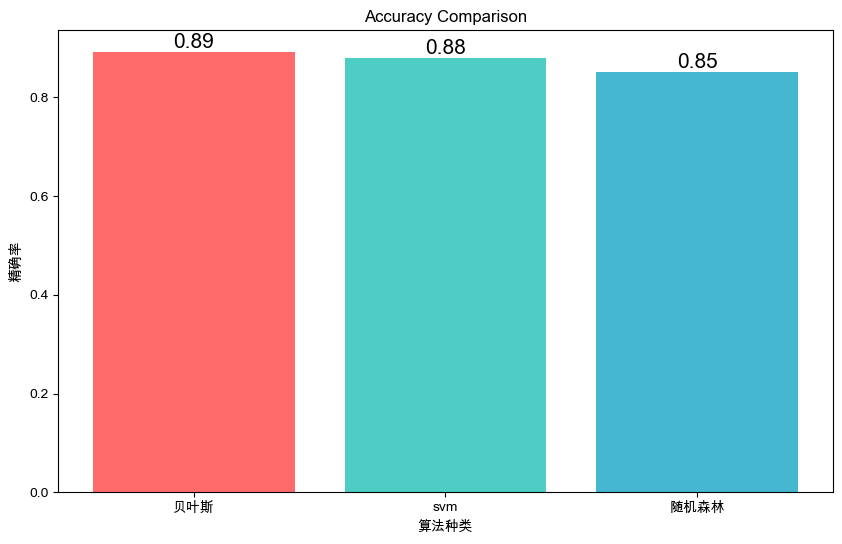

In [79]:
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure(figsize=(10, 6))
x_label = ["贝叶斯", "svm", "随机森林"]
color_list = ['#FF6B6B', '#4ECDC4', '#45B7D1']
acc_list = [accuracy_nb, accuracy_svm, accuracy_forest]
ax = plt.bar(x_label, acc_list, color=color_list)
plt.title('Accuracy Comparison')
plt.xlabel('算法种类')
plt.ylabel('精确率')
for rect in ax:  #rects 是三根柱子的集合
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(round(height, 2)), size=15, ha='center', va='bottom')
plt.show()
